## Electronic Structure Calculations using Quantum Phase Estimation (QPE)

In the realm of quantum computing, one of the most powerful algorithms for solving electronic structure calculations is the Quantum Phase Estimation (QPE) algorithm. Its application in quantum chemistry enables us to compute the eigenvalues of a unitary operator, which, in the context of molecular systems, translates into determining the ground state energy of a molecule with unprecedented precision. This method outperforms classical algorithms by leveraging quantum parallelism, a key to tackling the complex problem of molecular simulation.

At its core, the QPE algorithm estimates the phase (or eigenvalue) corresponding to an eigenstate of a given unitary operator. In electronic structure problems, the molecular Hamiltonian is encoded as a unitary matrix, and the phase estimation directly reveals the energy levels of the system. What makes QPE particularly powerful is its ability to provide highly accurate solutions for large molecules and complex systems where classical approaches often fail due to computational intractability.

QPE’s ability to yield exact eigenvalues, when paired with quantum algorithms like Variational Quantum Eigensolver (VQE), makes it a crucial component in pushing the boundaries of quantum chemistry. Where VQE provides an approximate solution, QPE refines it by calculating the precise energy levels of the molecular Hamiltonian. This synergy between variational approaches and phase estimation highlights the long-term promise of quantum computing for material science, drug discovery, and other industries reliant on molecular modeling.

While the implementation of QPE in near-term quantum hardware poses challenges due to noise and gate fidelity, ongoing advances in error correction and quantum hardware development make it a crucial algorithm for the future of quantum chemistry. Looking ahead, the role of QPE will only grow as quantum processors scale, enabling more accurate and efficient simulations of complex molecular structures, a feat currently out of reach for classical supercomputers.

Quantum Phase Estimation offers a robust framework for advancing electronic structure calculations, harnessing the unique capabilities of quantum computing. Its precision and potential to overcome the limitations of classical methods position it as a cornerstone of quantum algorithms, paving the way for breakthroughs in the simulation of chemical systems.

### Quantum Phase Estimation (QPE) and Electronic Structure Calculations

In this section, we combine **Quantum Phase Estimation (QPE)** with **Electronic Structure Calculations**, particularly in the context of methods like the **Hartree-Fock (HF)** or **Configuration Interaction (CI)** methods. The QPE algorithm is a powerful tool for estimating eigenvalues, which are critical in determining the energy levels of molecular systems.

#### Formula: Quantum Phase Estimation for Eigenvalue Approximation

In **Quantum Phase Estimation (QPE)**, the goal is to find the eigenvalue $\lambda$ corresponding to an eigenstate $\ket{\psi}$ of a unitary operator $U$. This is essential in electronic structure calculations, where we often need to compute the eigenvalues of the molecular Hamiltonian $H$, which represent the energy levels of the system.

#### QPE Formula:

The general formula for QPE is:

$$ U \ket{\psi} = e^{2\pi i \phi} \ket{\psi} $$

Where:
- $U$ is a unitary operator related to the molecular Hamiltonian $H$, such that $U = e^{-i H \tau}$ (with $\tau$ being a time parameter).
- $\ket{\psi}$ is the eigenstate of the Hamiltonian, representing the molecular wavefunction.
- $e^{2\pi i \phi}$ is the eigenvalue, where $\phi$ is the phase we want to estimate.

The phase $\phi$ is related to the energy eigenvalue $E$ through the equation:

$$ E = \frac{\phi}{\tau} $$

#### Application to Electronic Structure Calculations

1. **Hamiltonian Approximation**:
   The molecular Hamiltonian $H$ is decomposed into a sum of Pauli operators using techniques like **Hartree-Fock** or **Configuration Interaction (CI)**. The Hamiltonian is written as:

   $$ H = \sum_j c_j P_j $$

   Where:
   - $c_j$ are coefficients.
   - $P_j$ are tensor products of Pauli operators.
   
   This decomposition allows us to simulate the molecular system on a quantum computer using **QPE**.

2. **QPE for Energy Estimation**:
   By encoding the eigenstate of the Hamiltonian (e.g., a Hartree-Fock or CI state) into a quantum circuit, we use QPE to estimate the eigenvalue $E$, which corresponds to the energy of the molecular system:

   $$ E = \frac{\phi}{\tau} $$

   Here, $\phi$ is the phase retrieved from the QPE algorithm, which encodes the energy information of the system.

In the context of electronic structure calculations:
- **QPE** allows us to compute accurate energy eigenvalues of molecular systems by applying it to the Hamiltonian $H$.
- The phase $\phi$ obtained from QPE provides a direct estimate of the molecular energy $E$, which is crucial for studying molecular properties, chemical reactions, and dynamics. 


In [1]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.quantum_info import partial_trace
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define a quantum phase estimation circuit
n_qubits = 4  # Number of counting qubits
eigenstate_qubits = 2  # Number of eigenstate qubits

In [3]:
# Create QuantumCircuit for Quantum Phase Estimation
qc = QuantumCircuit(n_qubits + eigenstate_qubits, n_qubits)

In [4]:
# Apply Hadamard gates to the counting qubits
for i in range(n_qubits):
    qc.h(i)


In [5]:
# Define an example unitary operation (Pauli-Z) and apply controlled-unitary rotations
unitary_gate = QuantumCircuit(eigenstate_qubits)
unitary_gate.cz(0, 1)

In [6]:
# Add controlled unitaries (e.g., controlled-Z gates)
for i in range(n_qubits):
    qc.append(unitary_gate.to_gate().control(), [i] + [j + n_qubits for j in range(eigenstate_qubits)])

In [7]:
# Apply inverse Quantum Fourier Transform (QFT)
qc.append(QFT(n_qubits, inverse=True).to_gate(), range(n_qubits))

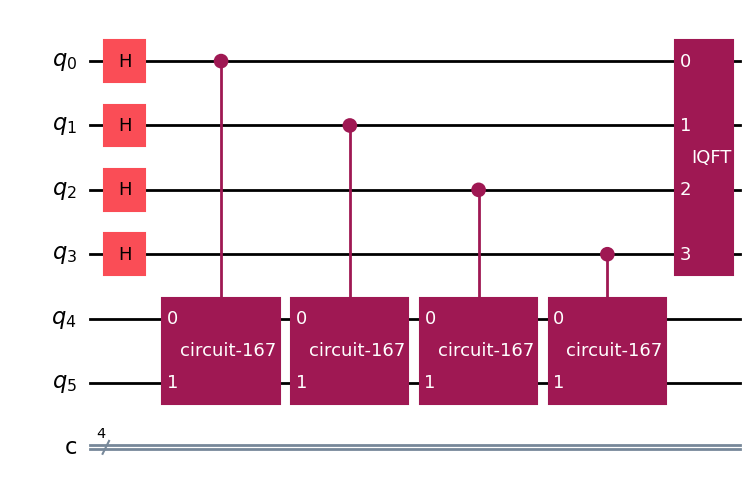

In [8]:
# Draw the circuit in `mpl` format (without measurement so far)
qc.draw('mpl')
plt.show()

In [9]:
# Simulate the statevector (before measurement)
state = Statevector.from_instruction(qc)

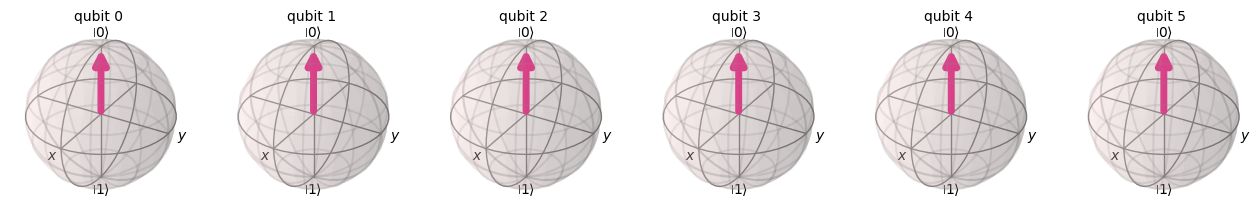

In [10]:
# Plot the Bloch multivector
plot_bloch_multivector(state)
plt.show()

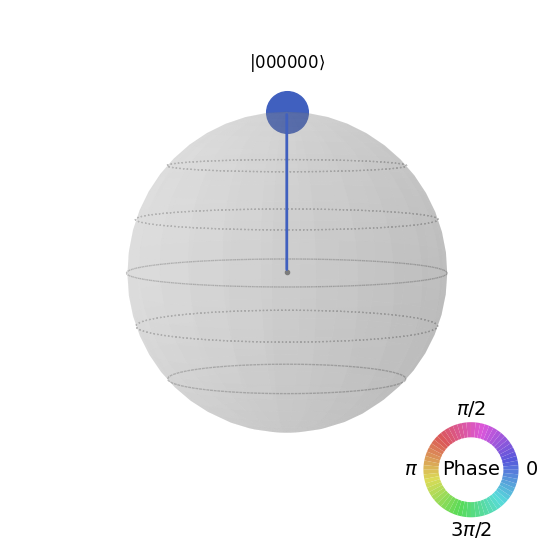

In [11]:
# Plot the QSphere
plot_state_qsphere(state)
plt.show()

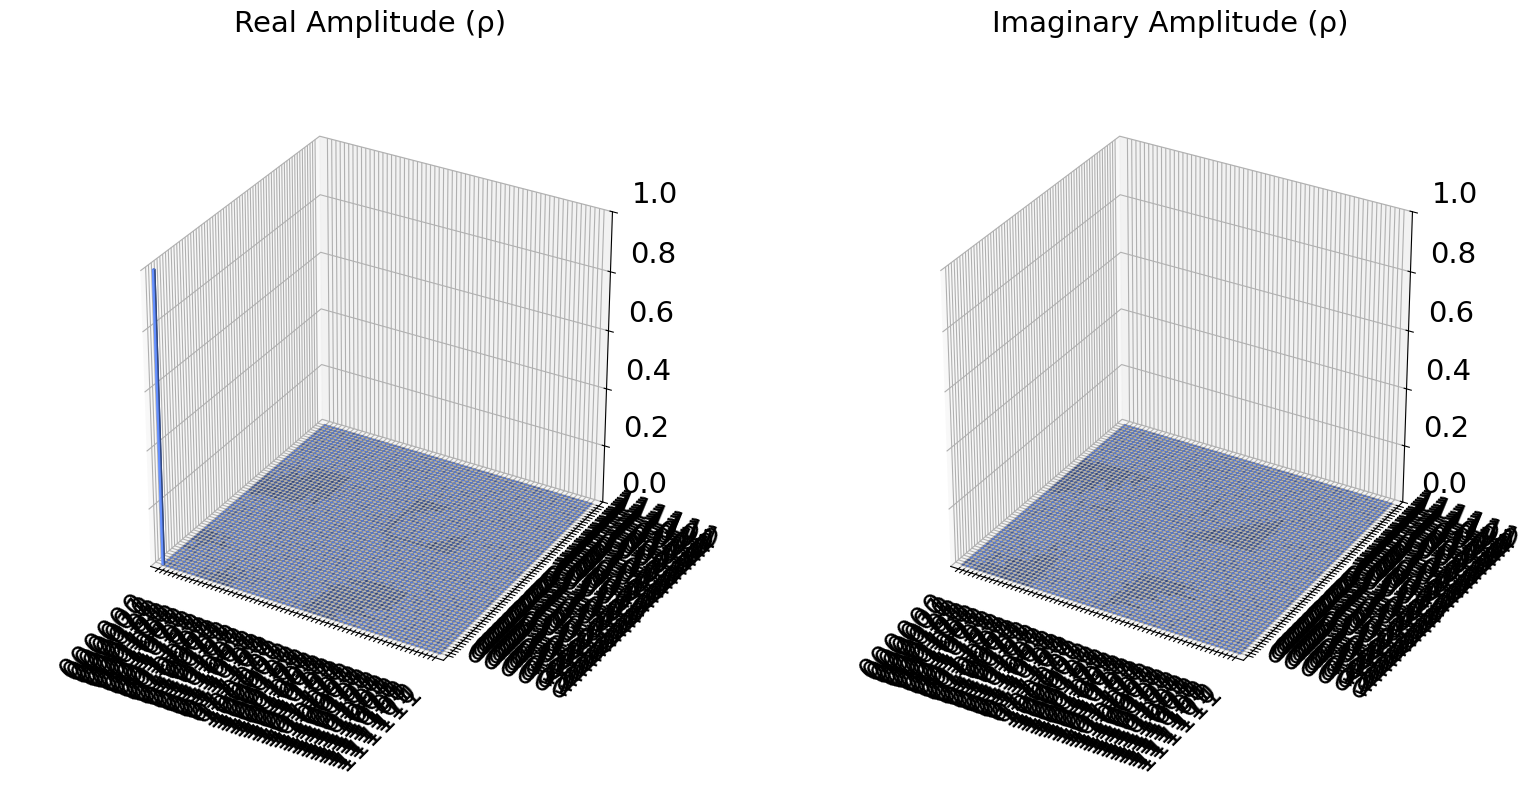

In [12]:
# Plot the state city
plot_state_city(state)
plt.show()

In [13]:
# Compute the partial trace and plot it (to focus on specific qubits)
rho = partial_trace(state, [0, 1])  # Trace out other qubits and focus on qubits 0 and 1

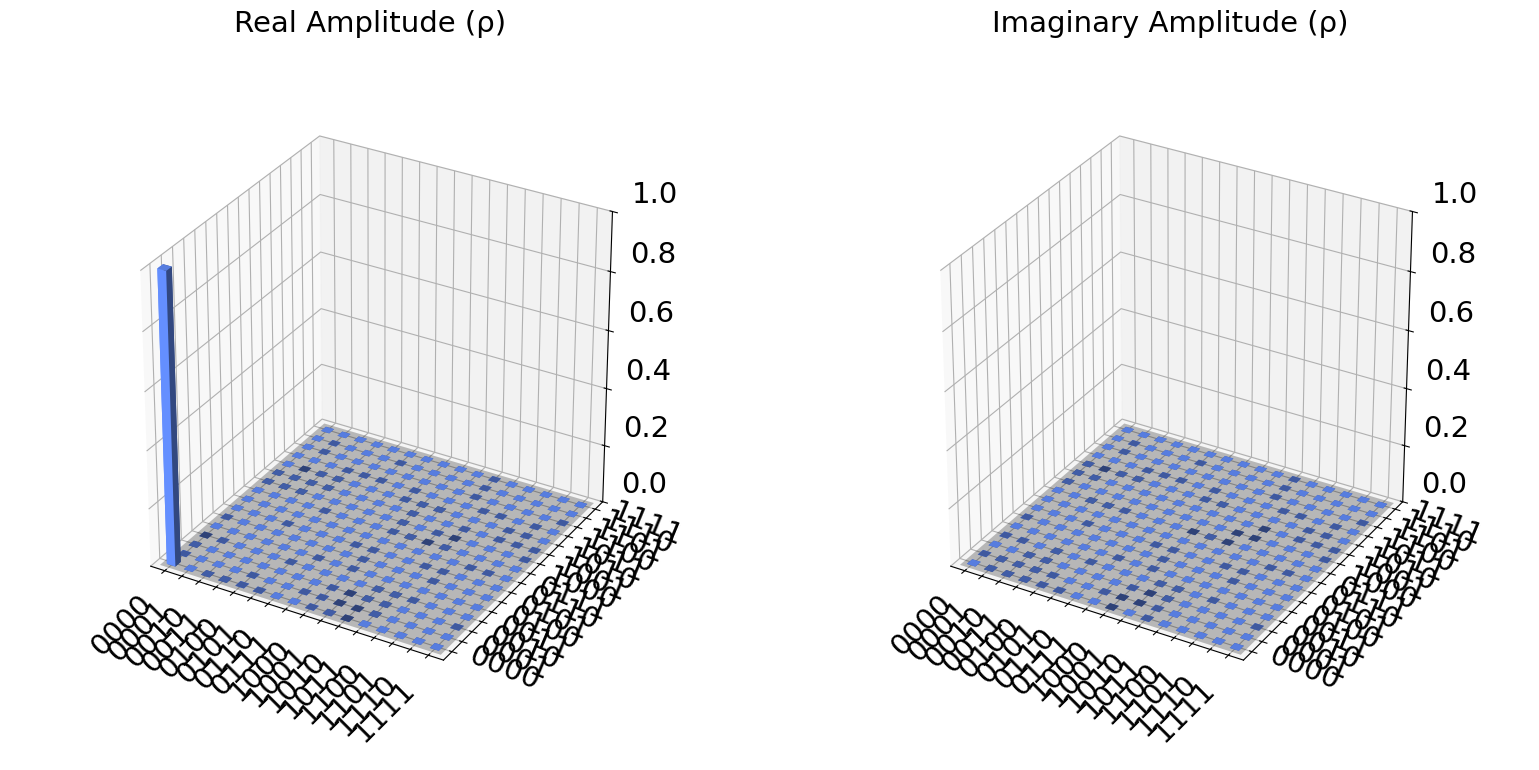

In [14]:
# Plot the partial trace in state city format
plot_state_city(rho)
plt.show()

In [15]:
# Now add the measurement gates to the original circuit
qc.measure(range(n_qubits), range(n_qubits))

In [16]:
# Simulate the circuit using AerSimulator (for measurement results)
simulator = AerSimulator()

In [17]:
# Run the circuit and obtain the results
transpiled_circtuit = transpile(qc, backend=simulator)
job = simulator.run(transpiled_circtuit, shots=1000)
result = job.result()

In [18]:
# Get the measurement outcomes
counts = result.get_counts(qc)

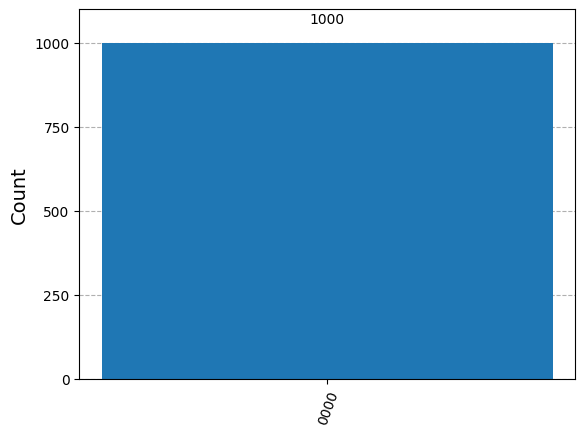

In [19]:
# Plot the measurement histogram
plot_histogram(counts)
plt.show()